In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load Boston Housing dataset
boston = fetch_openml(name='boston', version=2)

# Create a DataFrame
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target  # Median value of owner-occupied homes (target variable)



In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N


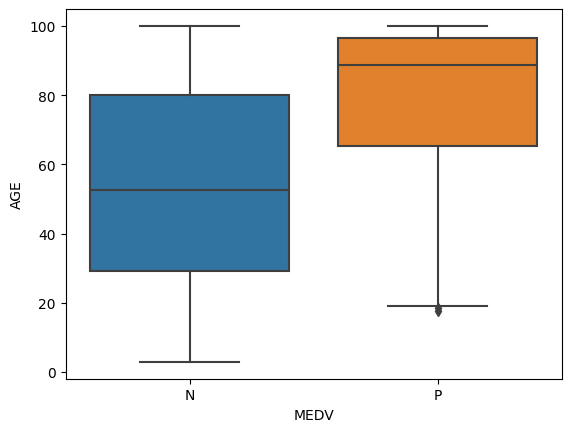

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example using seaborn
sns.boxplot(x="MEDV", y='AGE', data=boston_df)
plt.show()


In [5]:
boston_df=boston_df[['INDUS', 'AGE', 'MEDV']]

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [7]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'Categorical_Column' with the actual name of your categorical column

# Convert the categorical column to binary using one-hot encoding
boston_df = pd.get_dummies(boston_df, columns=['MEDV'], drop_first=True)


# Replace True/False values with 1/0
boston_df.replace({True: 1, False: 0}, inplace=True)

# Display the modified DataFrame
boston_df.head()


,INDUS,AGE,MEDV_P
0,2.31,65.2,0
1,7.07,78.9,1
2,7.07,61.1,0
3,2.18,45.8,0
4,2.18,54.2,0


In [8]:

# Split the Pandas DataFrame into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = boston_df.drop('MEDV_P', axis=1)
y = boston_df['MEDV_P']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

def build_model(activation_config, input_shape):
    model = Sequential()
    model.add(Dense(16, activation=activation_config[0], input_shape=(input_shape,)))

    for activation_func in activation_config[1:]:
        model.add(Dense(8, activation=activation_func))

    model.add(Dense(8, activation='relu'))  # Assuming you want a specific activation for the last hidden layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, y_train, X_test, y_test, activation_config, batch_size=32, epochs=5, validation_split=0.2):
    model = build_model(activation_config, X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    return test_accuracy

def generate_combinations(activation_functions, num_layers):
    return list(itertools.product(activation_functions, repeat=num_layers))

def evaluate_all_combinations(X_train, y_train, X_test, y_test, activation_functions, num_layers, batch_size=32, epochs=5, validation_split=0.2):
    combinations = generate_combinations(activation_functions, num_layers)
    results = {}

    for config in combinations:
        accuracy = train_and_evaluate(X_train, y_train, X_test, y_test, config, batch_size=batch_size, epochs=epochs, validation_split=validation_split)
        results[config] = accuracy
        print(f'Test Accuracy with {config} configuration: {accuracy}')

    # Sort the results based on accuracy in descending order
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_results


# Specify activation functions and number of layers
activation_functions = ['relu', 'tanh', 'linear']
num_layers = 3

# Evaluate all combinations
results = evaluate_all_combinations(X_train, y_train, X_test, y_test, activation_functions, num_layers)
print("Sorted Results:")
print(results)

4/4 [==============================] - 0s 2ms/step
Test Accuracy with ('relu', 'relu', 'relu') configuration: 0.7745098039215687
4/4 [==============================] - 0s 4ms/step
Test Accuracy with ('relu', 'relu', 'tanh') configuration: 0.6372549019607843
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ('relu', 'relu', 'linear') configuration: 0.7745098039215687
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ('relu', 'tanh', 'relu') configuration: 0.7843137254901961
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ('relu', 'tanh', 'tanh') configuration: 0.6372549019607843
4/4 [==============================] - 0s 4ms/step
Test Accuracy with ('relu', 'tanh', 'linear') configuration: 0.7843137254901961
4/4 [==============================] - 0s 2ms/step
Test Accuracy with ('relu', 'linear', 'relu') configuration: 0.7843137254901961
4/4 [==============================] - 0s 3ms/step
Test Accuracy with ('relu', 'linear', 't